# Old car price prediction

Link kaggle : https://www.kaggle.com/datasets/milanvaddoriya/old-car-price-prediction

The steps listed below must be included in your notebooks:

- 1 Understand the problem statement.
- 2 Import required libraries and Data.
- 3 Check the Data
- 4 Pre-processing and data cleansing should be done.
- 5 Utilize the provided dataset to conduct exploratory data analysis.
- 6 Each and every graph you create should be explained.
- 7 Feature Selection
- 8 Data splitting

Create an ML model, then test it using various metrics.

Data source - https://www.cardekho.com/used-car-details
Cover image source - https://cdni.autocarindia.com/Utils/ImageResizer.ashx?n=https://cdni.autocarindia.com/Galleries/20200206032922_Tata-Harrier-BS6-5.jpg&w=872&h=578&q=75&c=1




### 1 Compreendo o problema de negócio.

* Presumimos que o dataset representa um site de compra de automóveis usados. Portanto o valor alvo para previsão é justamente o valor do automóvel. Iremos passar pelo processo de importação dos dados para melhor explorar e conhece-los! 

* Os objetivos deste trabalho são: 
    * Realizar uma Anáise Exploratória nos dados;
    * Treinar um modelo de regressão para previsão do preço do automóvel.

### 2 - Realizando a importação dos pacotes necessários:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Rodrigo S. Pereira" --iversions

Author: Rodrigo S. Pereira

numpy      : 1.22.3
matplotlib : 3.5.1
pandas     : 1.4.2
sklearn    : 1.0.2
statsmodels: 0.13.2
seaborn    : 0.11.2



### 3 - Carregando o dataset e realizando análise exploratória: 

In [3]:
data = pd.read_csv('car_price.csv', index_col =False)
data.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [4]:
# Drop a primeira coluna que nesse caso é uma representação do mesmo indice já carregado automático pelo pandas
data = data.drop(data.columns[0], axis=1)

In [5]:
# Buscando uma amostra do dataset: 
data.sample(8)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
3109,Maserati Ghibli Diesel BSIV,66 Lakh,"12,000 kms",Diesel,Automatic,1st Owner,2016,796 cc,5 Seats
2006,Mahindra XUV500 W8 FWD,6.69 Lakh,"74,000 kms",Diesel,Manual,1st Owner,2012,1061 cc,5 Seats
5296,BMW X7 xDrive 40i,1.15 Crore,"39,000 kms",Petrol,Automatic,1st Owner,2019,1396 cc,5 Seats
3725,Maruti Wagon R LXI,2.75 Lakh,"93,688 kms",Petrol,Manual,1st Owner,2014,2143 cc,5 Seats
4675,Mahindra Renault Logan 1.4 GLX,1 Lakh,"90,000 kms",Petrol,Manual,3rd Owner,2008,1582 cc,5 Seats
2656,Hyundai i20 1.2 Sportz,2.16 Lakh,"54,004 kms",Petrol,Manual,3rd Owner,2011,796 cc,5 Seats
4283,Ford Ecosport 1.5 DV5 MT Trend,4.55 Lakh,"66,001 kms",Diesel,Manual,2nd Owner,2014,1197 cc,5 Seats
5248,Land Rover Range Rover Vogue SE 4.4 SDV8,35.25 Lakh,"87,002 kms",Diesel,Automatic,2nd Owner,2013,1248 cc,5 Seats


**Observações: Definições das categorias das variáveis:** 
- car_name: (nome do carro) Categoria nominal;
- car_prices_in_rupee: ( valor do carro * Lakh**) numerico continuo; 
- kms_driven: (km rodado) Variável numérica continua;
- fuel_type: (tipo de combustível) categorica nominal;
- transmission: ( tipo de transmissão) categorica nominal;
- ownership: (quantidade de donos que passou pelo carro) categorica ordinal;
- manufacture: (ano de fabricação) categorica ordinal;
- engine: (potencia do motor) numerico discreto; 
- seats: (quantidade de acentos) numerico discreto;

** "Lakh é laque (também lacassá ou lequé) é uma unidade do sistema de numeração indiana utilizada = 10^5,

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             5512 non-null   object
 1   car_prices_in_rupee  5512 non-null   object
 2   kms_driven           5512 non-null   object
 3   fuel_type            5512 non-null   object
 4   transmission         5512 non-null   object
 5   ownership            5512 non-null   object
 6   manufacture          5512 non-null   int64 
 7   engine               5512 non-null   object
 8   Seats                5512 non-null   object
dtypes: int64(1), object(8)
memory usage: 387.7+ KB


In [7]:
#Verificando duplicidade
data.duplicated().sum()
data[data.duplicated()]

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
1151,Audi Q5 3.0 TDI Quattro,9.95 Lakh,"68,000 kms",Diesel,Automatic,3rd Owner,2011,2967 cc,5 Seats
1297,Mercedes-Benz GLS 350d Grand Edition,59.50 Lakh,"45,000 kms",Diesel,Automatic,2nd Owner,2016,2499 cc,5 Seats
1351,Honda Jazz 1.2 V AT i VTEC,6.90 Lakh,"27,200 kms",Petrol,Automatic,1st Owner,2017,1462 cc,5 Seats
1352,Mahindra Thar CRDe,7.72 Lakh,"46,365 kms",Diesel,Manual,1st Owner,2017,1461 cc,5 Seats
1353,Maruti Ciaz Alpha BSIV,8.72 Lakh,"82,496 kms",Petrol,Manual,1st Owner,2019,1248 cc,5 Seats
...,...,...,...,...,...,...,...,...,...
5301,Mercedes-Benz E-Class E250 CDI Avantgarde,25.90 Lakh,"60,625 kms",Diesel,Automatic,2nd Owner,2016,1197 cc,5 Seats
5318,Mercedes-Benz E-Class Exclusive E 220d,76.25 Lakh,"2,000 kms",Diesel,Automatic,1st Owner,2022,1950 cc,5 Seats
5322,BMW X3 xDrive 20d Luxury Line,60 Lakh,"19,000 kms",Diesel,Automatic,1st Owner,2021,1997 cc,5 Seats
5338,Volvo S90 D4 Inscription BSIV,44.75 Lakh,"20,000 kms",Diesel,Automatic,1st Owner,2018,1950 cc,5 Seats


Conforme observado acima, é preciso realizar alterações nos tipos das variáveis e fazer algumas limpezas.
Nos próximos passos serão realizados: 

- Há a presença de 79 duplicidades, esses serão removidos do dataset. 

- car_name: será preservado; 
- car_prices_in_rupee: será transformado em duas colunas uma price e a outra multiply; 
- kms_drive: será removido o kms e removido a "," para transformação em tipo inteiro; 
- manufacture: será convertido para tipo int; 
- engine: será removido o "cc" e transformado para tipo inteiro;
- Steats: será removido "Seats" e posteriormente para tipo inteiro;

- A variável car_name será preservada, pois não será considerada para o treinamento do modelo. Será somente para critério de análise exploratória. 
- fuel_type, transmission, ownership serão realizados seus devidos tratamentos posteriormente na etapa de preprocessamento. 

**Aqui vamos trabalhar com uma cópia do dataset para poder preservar os dados originais carregados**

In [8]:
df = data.copy()

# Remover duplicidades
df = df.drop_duplicates().reset_index(drop=True)

# Var: car_prices_in_rupee - remover Lahk e converter para tipo float
df[['price', 'multiply']] = data['car_prices_in_rupee'].str.split(' ', 1, expand=True)
df.drop('car_prices_in_rupee', axis=1, inplace=True)


In [9]:
# Var: kms_driven - removendo kms e convertendo para tipo inteiro
df['kms_driven'] = df['kms_driven'].str.replace(' kms', '')
df['kms_driven'] = df['kms_driven'].str.replace(',', '').astype('int')

# Var: manufacture -  converter para datetime
df['manufacture'] = df['manufacture'].astype('int')

# Var: engine - remover cc e converter para int
df['engine'] = df['engine'].str.replace(' cc', '').astype('int')

#Var: Seats - remover Seats e converter para int
df['Seats'] = df['Seats'].str.replace(' Seats', '').astype('int')

# Var price - converter para tipo float: 
df['price'] = df['price'].str.replace(',', '.').astype('float')

In [10]:
df.sample(4)

,car_name,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,price,multiply
4364,Maruti Eeco 5 Seater AC BSIV,168000,Petrol,Manual,3rd Owner,2012,1196,5,4.14,Lakh
332,Ford Ecosport 1.5 Petrol Titanium Plus AT BSIV,31000,Petrol,Automatic,1st Owner,2020,1497,5,11.85,Lakh
429,Hyundai i20 1.2 Asta,54801,Petrol,Manual,2nd Owner,2018,1197,5,7.25,Lakh
1336,Mercedes-Benz GLC 300 4MATIC Sport,28500,Petrol,Automatic,1st Owner,2019,1248,5,6.40,Lakh


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5436 entries, 0 to 5435
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car_name      5436 non-null   object 
 1   kms_driven    5436 non-null   int64  
 2   fuel_type     5436 non-null   object 
 3   transmission  5436 non-null   object 
 4   ownership     5436 non-null   object 
 5   manufacture   5436 non-null   int64  
 6   engine        5436 non-null   int64  
 7   Seats         5436 non-null   int64  
 8   price         5436 non-null   float64
 9   multiply      5436 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 424.8+ KB


### Verificação da distribuição das variáveis numéricas

In [12]:
# Resumo variáveis numéricas: 
df.describe()

,kms_driven,manufacture,engine,Seats,price
count,5436.000000,5436.000000,5436.000000,5436.000000,5436.000000
mean,63343.080390,2015.437822,1532.926784,5.252208,11.610213
std,41961.414723,3.938207,580.933381,0.722515,16.628434
min,250.000000,1995.000000,0.000000,2.000000,1.000000
25%,33234.000000,2013.000000,1197.000000,5.000000,3.240000
50%,59290.000000,2016.000000,1396.000000,5.000000,5.550000
75%,84363.000000,2018.000000,1950.000000,5.000000,10.502500
max,560000.000000,2022.000000,5950.000000,8.000000,99.999000


Observação

- Nota-se que há a presença de valores para a variável engine igual a 0. Caso improvável, pois todo motor deve haver uma potência diferente de 0. Portanto esses 120 registros estão com valores nulos. A opção tratada aqui será em remove-los do dataset. 

In [13]:
df = df[~df.isin(df.loc[df['engine']==df['engine'].min()])].reset_index(drop=True)

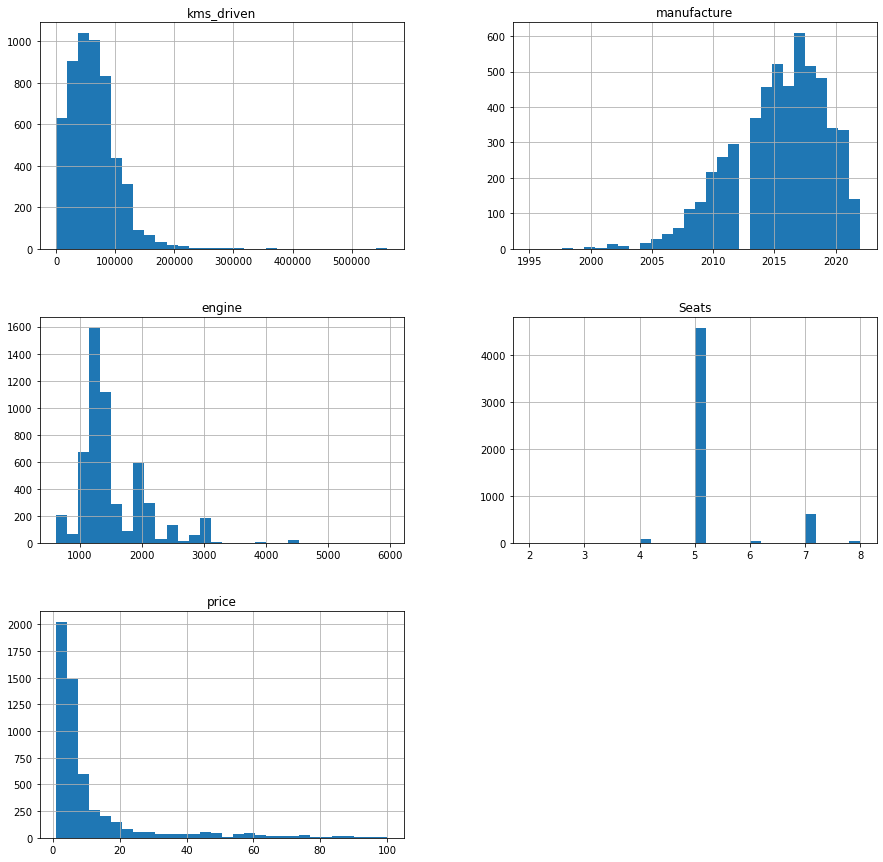

In [14]:
# Plot Histogramas variáveis numéricas
df.hist(figsize = (15,15), bins = 30) 
plt.show()

Observações: 
- Variável kms_driven possui uma calda longa para a direta, podendo haver outilers, a maioria dos carros irão possuir entre 33 a 84 mil km rodados;
- Variável manufacture possui uma calda longa para a esquerda, a maior frequencia de carros produzidos entre 2015 e 2020. 
- Variável engine possui uma calda longa para direita, a média de potência fica em torno de 1532 cc
- Variável Seats possui 5 categorias sendo a com maior frequencia a de 5 lugares. 


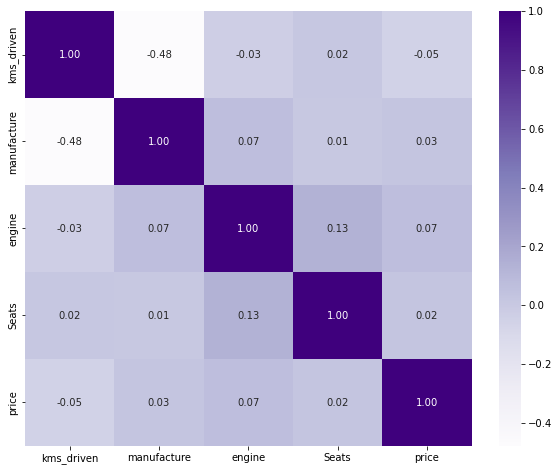

In [15]:
# Verificando as correlações das variáveis numéricas: 
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), cmap = 'Purples', annot = True, fmt = '.2f');

Observações: 
- Em um primeiro momento nota-se que quase não há correlações entre a variável alvo "price" com as outras variáveis numéricas, possuem valores muito próximo a 0. Tal suposição é reforçada através da visualizações dos gráficos de correlações plotado abaixo: 

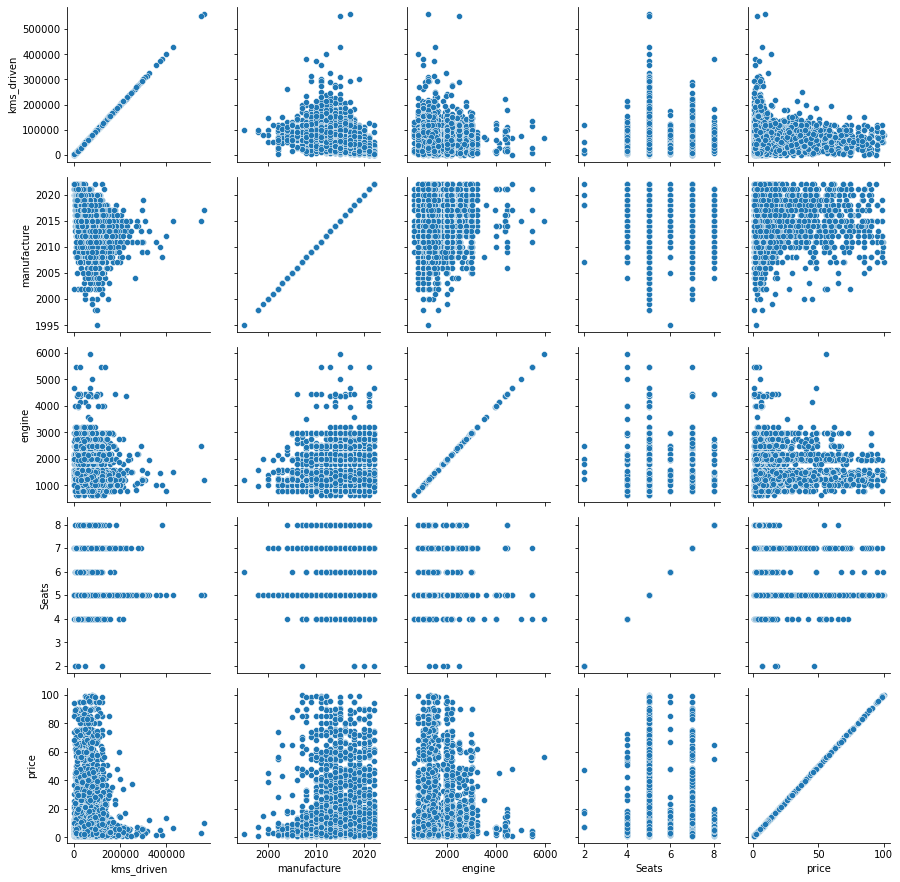

In [16]:
# Plot gráficos de correlações
g = sns.PairGrid(df)
g.map(sns.scatterplot)

### Variáveis Categoricas:

In [17]:
df.dtypes[df.dtypes == 'object']

car_name        object
fuel_type       object
transmission    object
ownership       object
multiply        object
dtype: object

In [18]:
df[df.dtypes[df.dtypes == 'object'].index.values].describe()

,car_name,fuel_type,transmission,ownership,multiply
count,5424,5424,5424,5424,5424
unique,1893,5,2,6,3
top,Maruti Alto 800 LXI,Petrol,Manual,1st Owner,Lakh
freq,53,2928,3913,3666,5250


Observação: 
 - Para a variável car_name há um total de 1896 nomes presentes, aqui vamos renomear para somente com a marca do fabricante. 
 - O tipo de transmissão com maior anuncio de venda é o Manual com 3919 vezes. 
 - A maior frequencia é a passagem de somente um dono no carro a venda, com um total de 3678
 - A moeda com maior frequencia é a Lakh com 5258. Portanto, nota-se a presença de outros 178 registros com outro tipo de moeda. Será adotado nesse trabalho o uso somente da Lakh, os outros 178 registros serão excluidos para não gerar conflitos com o modelo de treinamento. 

In [19]:
# Excluindo os 178 registros com currency diferente de Lakh
df = df[df['multiply']=='Lakh'].reset_index(drop=True)

In [20]:
# Convertendo coluna car_name para somente as marcas representadas
df['car_name'] = df['car_name'].str.split().str[0]

In [21]:
# Verificando novamente a composição das variáveis categoricas:
df[df.dtypes[df.dtypes == 'object'].index.values].describe()

,car_name,fuel_type,transmission,ownership,multiply
count,5250,5250,5250,5250,5250
unique,32,5,2,6,1
top,Maruti,Petrol,Manual,1st Owner,Lakh
freq,1320,2830,3778,3557,5250


Observações
- Nota-se que a maior presença de carros a venda são da marca Maruti Suzuki, com 1321 representações. 

Pergunta: 
- Quais são as 5 marcas de carro com maior média de km rodado disponível para venda? 
    * Nesse caso, primeiro vamos verificar a média de km rodado por marca e por ano.
    * Fazer o levantamento das 5 maiores médias.
    * Plotar o gráfico.



<AxesSubplot:xlabel='car_name'>

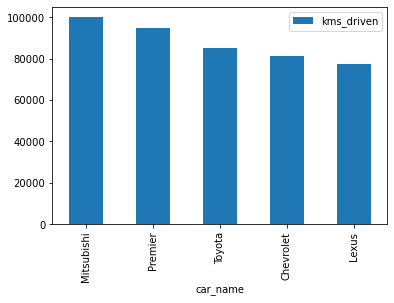

In [22]:
# Agrupamento do car_name com a média de kms_driven
mean_km_carname = df.groupby(['car_name']).agg({'kms_driven':'mean'}).sort_values('kms_driven', ascending=False).head(5)

# Plot evolução da média de km rodado por marca
mean_km_carname.plot.bar()

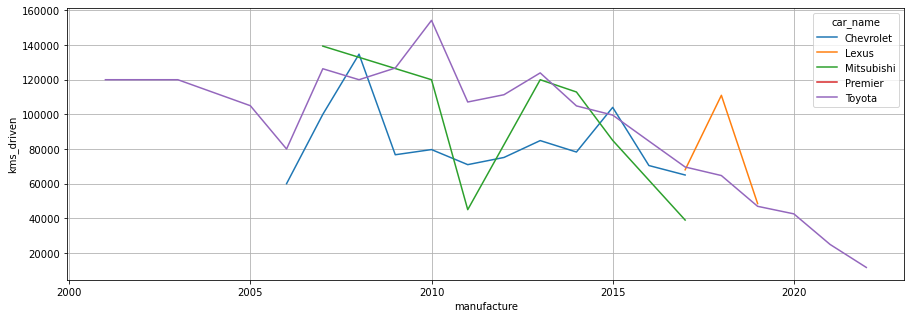

In [23]:
#Plot do gráfico da média de km rodado de acordo com o ano dos 5 marcas com maiores médias de km rodado
df_plot = df[df['car_name'].isin(mean_km_carname.index.values)].groupby(['car_name', 'manufacture']).agg({'kms_driven':'mean'})
plt.figure(figsize=(15,5))
sns.lineplot(data=df_plot, x='manufacture', y='kms_driven', hue = 'car_name')
plt.grid('on')

* Conforme observado no gráfico de barra acima, os carros que apresentam maior valores de km rodado são da marca Mitsubishi, Toyota, Chevolet e Lexus. O Prime não foi considerado pois há uma única representação com um alto km rodado ( pode ser considerado um outlier). 

In [24]:
# Exemplo
df[df['car_name']=='Premier']

,car_name,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,price,multiply
472,Premier,95000.0,Petrol,Manual,1st Owner,2014.0,2523.0,5.0,3.5,Lakh


Pergunta: 

* Qual é a média dos preços dado a categoria de tipo de combustível? 

In [25]:
df.groupby('fuel_type').agg({'price':'mean'}).sort_values('price', ascending=False)

,price
fuel_type,
Diesel,11.881248
Electric,11.735833
Lpg,9.166087
Petrol,8.935841
Cng,7.982727


<AxesSubplot:xlabel='fuel_type'>

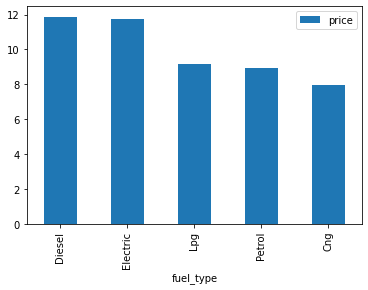

In [26]:
# Plot tipo de combustível pela média de valor do carro
df.groupby('fuel_type').agg({'price':'mean'}).sort_values('price', ascending=False).plot.bar()

Os carros que possuem tipo de combustível diesel e eletrico são os que carregam as maiores médias de valores. 

Pergunta

* Qual a relação entre a média dos preços com o tipo de transmissão ? 
    - R: Conforme apresentado no gráfico abaixo, o tipo automático possui uma média superior que os manuais;

<AxesSubplot:xlabel='transmission'>

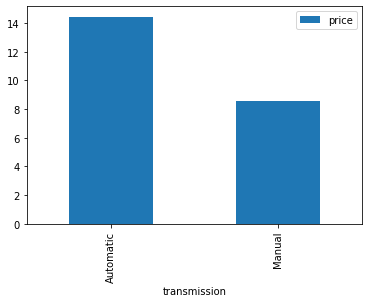

In [27]:
# Plot tipo de transmissão com valor médio dos preços 
df.groupby('transmission').agg({'price':'mean'}).sort_values('price', ascending=False).plot.bar()

Pergunta

* Quais as relações da variável engine ( potencia do motor) com seu valor de mercado ?


In [28]:

df['engine'].describe()

count    5250.000000
mean     1537.160952
std       578.450709
min       624.000000
25%      1197.000000
50%      1396.000000
75%      1950.000000
max      5950.000000
Name: engine, dtype: float64

Aqui vamos realizar a transformação da variável engine em uma categoria de 3 classes: lower - medium - high:
- lower : 624 - 1200; 
- medium: 1201 - 2000;
- high : < 2000;

In [29]:
# Separando a variável engine em categorias lower, medium and high.
df['engine_cat'] = pd.cut(df['engine'],
                              bins=[600., 1200., 2000, np.inf],
                              labels=['lower', 'medium', 'high'])

<AxesSubplot:xlabel='engine_cat'>

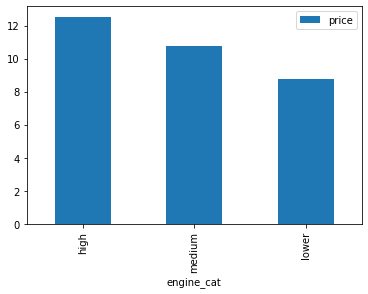

In [30]:
# Plot variável engine_cat relacionado aos valores médios de venda
df.groupby('engine_cat').agg({'price':'mean'}).sort_values('price', ascending=False).plot.bar()

Podemos observar a relação direta entre potência e o preço médio dos carros. 

Pergunta

- Qual a relação do histórico de posse "ownership" com o preço? 

<AxesSubplot:xlabel='ownership'>

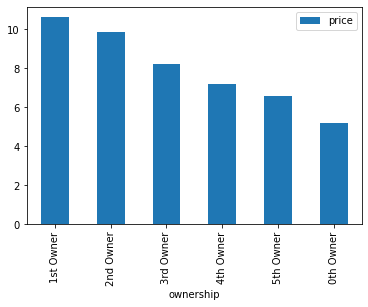

In [31]:
# Plot variável ownership relacionado aos valores médios de venda
df.groupby('ownership').agg({'price':'mean'}).sort_values('price', ascending=False).plot.bar()

* Podemos notar a relação direta entre a quantidade de "donos" que o carro teve e o valor seu de mercado.

## Definindo as variáveis para treinamento do modelo

In [32]:
df_model = df.copy()
select_var = ['kms_driven', 'fuel_type', 'transmission', 'ownership', 'engine_cat', 'Seats', 'price']
df_model = df_model[select_var]

In [33]:
df_model.head()

,kms_driven,fuel_type,transmission,ownership,engine_cat,Seats,price
0,86226.0,Diesel,Manual,1st Owner,medium,5.0,10.03
1,13248.0,Petrol,Automatic,1st Owner,medium,5.0,12.83
2,60343.0,Petrol,Automatic,1st Owner,high,5.0,16.40
3,26696.0,Petrol,Automatic,1st Owner,lower,5.0,7.77
4,69414.0,Petrol,Manual,1st Owner,lower,5.0,5.15


#### Pre processamento
Variáveis que precisam ser normalizadas:
- kms_driven;

Variáveis categorica tipo de tratamento:
- fuel_type - label encoding;
- transmission - label encoding;
- ownership - label encoding;
- engine_cat - label encoding;
- Seats - label encoding;

In [34]:
# Normalizando kms_driven: 
df_model['kms_driven'] = MinMaxScaler().fit_transform(df_model['kms_driven'].values.reshape(len(df_model), 1))

In [35]:
# Aplicando label encoding para as variáveis categoricas:
dic_fuel_type = {'Diesel': 0, 'Petrol': 1, 'Cng': 2, 'Lpg': 3, 'Electric': 4}
dic_transmission = {'Manual': 0, 'Automatic': 1}
dic_ownership = {'1st Owner': 0, '2nd Owner': 1, '3rd Owner': 2, '4th Owner': 3, '5th Owner': 4, '0th Owner': 5}
dic_engine_cat = {'lower': 0, 'medium': 1, 'high': 2}

df_model.fuel_type = df_model.fuel_type.map(dic_fuel_type)
df_model.transmission = df_model.transmission.map(dic_transmission)
df_model.ownership = df_model.ownership.map(dic_ownership)
df_model.engine_cat = df_model.engine_cat.map(dic_engine_cat)


In [36]:
df_model.head()

,kms_driven,fuel_type,transmission,ownership,engine_cat,Seats,price
0,0.153597,0,0,0,1,5.0,10.03
1,0.023221,1,1,0,1,5.0,12.83
2,0.107357,1,1,0,2,5.0,16.40
3,0.047246,1,1,0,0,5.0,7.77
4,0.123562,1,0,0,0,5.0,5.15


#### Separando dados de treino e teste

In [37]:
# Separando variável alvo
y_target = df_model.price

In [38]:
# Separando variáveis objeto
x_obj = df_model.drop('price', axis=1)

In [39]:
# Split em dados de treino e teste com amostragem estratificada
X_treino, X_teste, y_treino, y_teste = train_test_split(x_obj, 
                                                        y_target, 
                                                        test_size = 0.20)

In [40]:
# Aplicando regressão linear statsmodel 
model = sm.OLS(y_treino, X_treino)
results = model.fit()

In [41]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.392
Model:                            OLS   Adj. R-squared (uncentered):              0.391
Method:                 Least Squares   F-statistic:                              451.1
Date:                Thu, 29 Dec 2022   Prob (F-statistic):                        0.00
Time:                        19:08:37   Log-Likelihood:                         -16745.
No. Observations:                4200   AIC:                                  3.350e+04
Df Residuals:                    4194   BIC:                                  3.354e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------